https://www.kaggle.com/code/jessemostipak/getting-started-tpus-cassava-leaf-disease/notebook
https://www.kaggle.com/learn/intro-to-deep-learning

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])


2022-04-12 20:39:18.692503: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

In [4]:
import pandas as pd

concrete = pd.read_csv('data/dl-course-data/concrete.csv')
concrete.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
row, col = concrete.shape
input_shape = [col - 1]
input_shape

[8]

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

We can define the activation layer as below.

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512, input_shape=input_shape),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=1)
])

In [35]:
# Training with the wines dataset

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='mae'
)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

wines = pd.read_csv('../deep_learning_tutorial/data/dl-course-data/red-wine.csv')
pre_processor = Pipeline([
    ('scaler', MinMaxScaler())
])
X = wines.drop('quality', axis=1).copy()
y = wines.quality.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

X_train = pre_processor.fit_transform(X_train)
X_test = pre_processor.transform(X_test)
y_train = pre_processor.fit_transform(y_train.values.reshape(-1,1))
y_test = pre_processor.transform(y_test.values.reshape(-1,1))

# # Create training and validation splits
# df_train = wines.sample(frac=0.7, random_state=0)
# df_valid = wines.drop(df_train.index)

# # Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

# # Split features and target
# X_train = df_train.drop('quality', axis=1)
# X_test = df_valid.drop('quality', axis=1)
# y_train = df_train['quality']
# y_test = df_valid['quality']

In [62]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.214286,0.289256,0.00,0.089041,0.091973,0.089552,0.029412,0.374449,0.519685,0.149701,0.384615
1,0.151786,0.615702,0.03,0.157534,0.098662,0.388060,0.191176,0.361968,0.685039,0.095808,0.661538
2,0.294643,0.491736,0.22,0.095890,0.105351,0.179104,0.275735,0.500000,0.393701,0.125749,0.169231
3,0.178571,0.347107,0.13,0.075342,0.107023,0.208955,0.110294,0.530837,0.685039,0.185629,0.215385
4,0.562500,0.148760,0.58,0.082192,0.070234,0.089552,0.047794,0.582232,0.448819,0.329341,0.323077
...,...,...,...,...,...,...,...,...,...,...,...
1114,0.258929,0.553719,0.21,0.095890,0.125418,0.298507,0.227941,0.398678,0.299213,0.065868,0.123077
1115,0.214286,0.388430,0.00,0.082192,0.132107,0.119403,0.029412,0.353157,0.535433,0.131737,0.476923
1116,0.339286,0.181818,0.40,0.260274,0.071906,0.029851,0.011029,0.536711,0.503937,0.197605,0.492308
1117,0.285714,0.057851,0.42,0.047945,0.075251,0.253731,0.088235,0.288546,0.433071,0.215569,0.430769


In [57]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846,0.4
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846,0.4
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231,0.4
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692,0.6


In [69]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000
)

Epoch 1/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0689 - val_loss: 0.1001
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0663 - val_loss: 0.1019
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0711 - val_loss: 0.0984
Epoch 4/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0686 - val_loss: 0.0964
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0642 - val_loss: 0.1016
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0636 - val_loss: 0.0977
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0610 - val_loss: 0.0970
Epoch 8/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0633 - val_loss: 0.0984
Epoch 9/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0630 - val_loss: 0.0972
Epoch 10/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0610 - val_loss: 0.0976
Epoch 11/

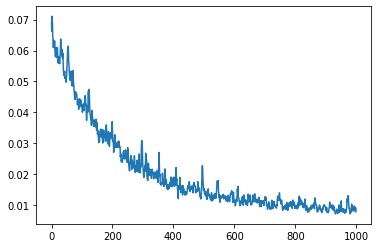

In [70]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();